In [1]:
! pip install pandas numpy scikit-learn nltk matplotlib seaborn wordcloud spacy flask openpyxl ydata_profiling textblob ipywidgets

In [2]:
!python -m spacy download es_core_news_sm

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---------------------------------- ---- 11.3/12.9 MB 58.9 MB/s eta 0:00:01
     --------------------------------------- 12.9/12.9 MB 50.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [3]:
import pandas as pd
import numpy as np
import nltk
import re
import unicodedata
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from sklearn.model_selection import LeaveOneOut, cross_val_score, RepeatedKFold, LeaveOneOut, KFold
import spacy
import pandas as pd
import numpy as np
import nltk
import re
import unicodedata
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from sklearn.model_selection import LeaveOneOut, cross_val_score, RepeatedKFold, LeaveOneOut, KFold

%matplotlib inline

In [4]:
# Cargamos los datos
ODS_Train_data = pd.read_csv('./dataset/ODScat_345.csv' , encoding='utf-8')
ODS_Test_data = pd.read_csv('./dataset/TestODScat_345.csv' , encoding='utf-8')

# 1. Entendimiento del negocio y enfoque analitico

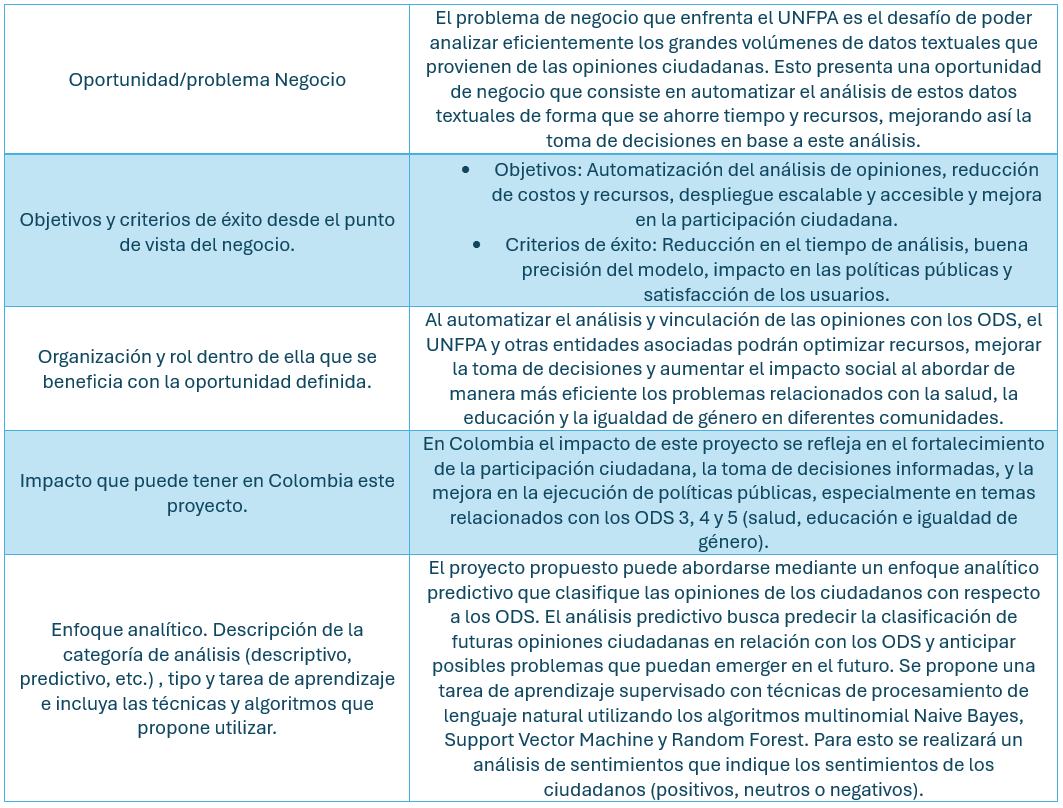


# 2. Entendimiento de los Datos

In [5]:
#Leemos el dataset ODScat_345
ODS_train_data = pd.read_csv('./dataset/ODScat_345.csv')
ODS_train_data.head()

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas ...",3
1,"En 2007, el gobierno central financió directam...",3
2,"Claramente, hay muchos otros factores en juego...",3
3,"Por ejemplo, el estado australiano de Victoria...",3
4,"El consumo anual de alcohol se estima en 15,7 ...",3


In [6]:
ODS_Test_data = pd.read_csv('./dataset/TestODScat_345.csv')
ODS_Test_data.head()

,Textos_espanol,sdg
0,Han examinado la contribuciÃ³n de las univers...,NaN
1,"En la última década, y en particular desde 201...",NaN
2,¿En qué países los estudiantes de alto rendimi...,NaN
3,A raíz de su preocupación por el hecho de que ...,NaN
4,"1999|H5|, Ares Abalde, 2014[ij]. El pequeño nú...",NaN


In [7]:
ODS_train_data.shape

(4049, 2)

In [8]:
ODS_Test_data.shape

(702, 2)

In [9]:
ODS_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  4049 non-null   object
 1   sdg             4049 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.4+ KB


In [10]:
ODS_Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Textos_espanol  702 non-null    object 
 1   sdg             0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 11.1+ KB


In [11]:
#Perfilamiento con ydata_profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(ODS_train_data, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Datos estadísticos

In [12]:
from scipy import stats as st

textos = ODS_train_data.copy()
# Contar caracteres y palabras en la columna 'Textos_espanol'
total_caracteres = ODS_train_data['Textos_espanol'].str.len().sum()
total_palabras = ODS_Train_data['Textos_espanol'].str.split().str.len().sum()

# Imprimir los resultados
print(f'Total de caracteres: {total_caracteres}')
print(f'Total de palabras: {total_palabras}')

#Contar palabras por fila
textos['conteo'] = [len(x) for x in textos['Textos_espanol']]

#Calcular moda media y mediana con scipy
textos['Moda'] = [st.mode([len(word) for word in message.split(' ')], keepdims=True)[0][0] for message in textos['Textos_espanol']]
textos['Mediana'] = [int(np.median([len(word) for word in message.split(' ')])) for message in textos['Textos_espanol']]
textos['Media'] = [int(np.mean([len(word) for word in message.split(' ')])) for message in textos['Textos_espanol']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Rango'] = textos['Max'] - textos['Min']
textos['Desviacion'] = [int(np.std([len(word) for word in message.split(' ')])) for message in textos['Textos_espanol']]
textos['Varianza'] = [int(np.var([len(word) for word in message.split(' ')])) for message in textos['Textos_espanol']]
textos['Palabra_mas_frecuente'] = [Counter(message.split()).most_common(1)[0][0] for message in textos['Textos_espanol']]
textos['Frecuencia_palabra_mas_frecuente'] = [Counter(message.split()).most_common(1)[0][1] for message in textos['Textos_espanol']]
textos['Palabra_menos_frecuente'] = [Counter(message.split()).most_common()[-1][0] for message in textos['Textos_espanol']]
textos['Frecuencia_palabra_menos_frecuente'] = [Counter(message.split()).most_common()[-1][1] for message in textos['Textos_espanol']]

textos


Total de caracteres: 2832812
Total de palabras: 446612


,Textos_espanol,sdg,conteo,Moda,Mediana,Media,Max,Min,Rango,Desviacion,Varianza,Palabra_mas_frecuente,Frecuencia_palabra_mas_frecuente,Palabra_menos_frecuente,Frecuencia_palabra_menos_frecuente
0,"Por ejemplo, el nÃºmero de consultas externas ...",3,944,2,3,4,18,1,17,3,11,de,16,SP.,1
1,"En 2007, el gobierno central financió directam...",3,476,2,4,5,14,1,13,3,9,del,4,hospitales.,1
2,"Claramente, hay muchos otros factores en juego...",3,1207,2,5,5,15,1,14,3,11,de,12,ODM.,1
3,"Por ejemplo, el estado australiano de Victoria...",3,1090,2,5,5,17,1,16,3,13,de,15,interregionales.,1
4,"El consumo anual de alcohol se estima en 15,7 ...",3,895,2,3,4,13,1,12,2,6,de,19,15.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,"Para ello, identificará las cuestiones de géne...",5,822,2,4,5,16,1,15,3,14,de,12,género.,1
4045,La participación de las mujeres en roles de li...,5,514,2,5,5,16,1,15,3,12,de,9,Presidencial.,1
4046,"Según el WEF, según las tendencias de 2016, po...",5,445,2,5,5,17,1,16,3,12,el,4,países.,1
4047,"Sirve como recurso y foro para las agencias, c...",5,1017,2,4,5,15,1,14,3,10,de,17,Justicia.,1


Contando la frecuencia de cada palabra y determinando las más repetidas

In [13]:
# Unir todos los textos en una sola cadena
all_text = ' '.join(ODS_train_data['Textos_espanol'])

# Limpiar y dividir el texto en palabras
words = re.findall(r'\b\w+\b', all_text.lower())

# Contar la frecuencia de cada palabra
word_freq = Counter(words)

# Mostrar las 10 palabras más comunes
print(word_freq.most_common(10))

[('de', 37886), ('la', 20822), ('en', 15518), ('y', 15135), ('los', 13629), ('el', 11728), ('las', 10382), ('a', 8518), ('que', 8462), ('para', 5966)]


Distribución de la longitud de las palabras y KDE

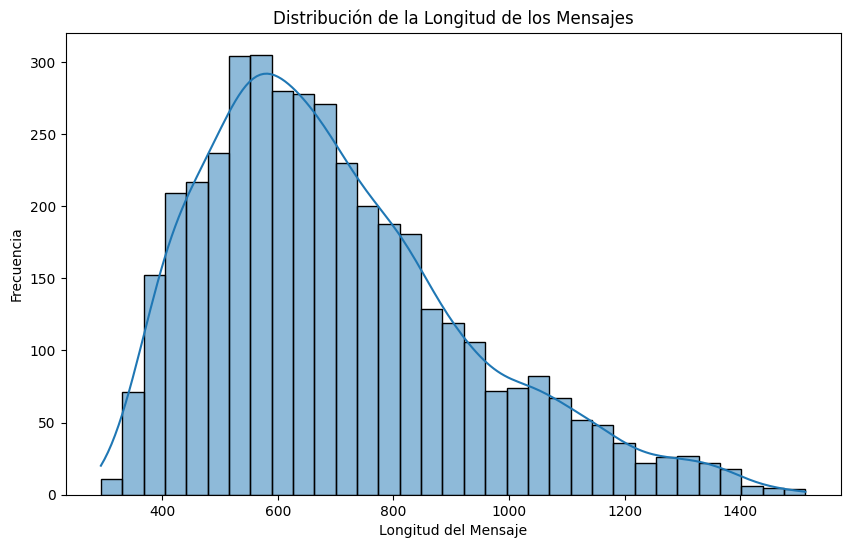

Asimetría: 0.8350624465488269, Curtosis: 0.32436533938895895


In [14]:
# 5. Visualización de la Distribución Usando Histogramas y KDE
plt.figure(figsize=(10, 6))
sns.histplot(textos['conteo'], kde=True)
plt.title('Distribución de la Longitud de los Mensajes')
plt.xlabel('Longitud del Mensaje')
plt.ylabel('Frecuencia')
plt.show()

# 6. Cálculo de la Asimetría (Skewness) y Curtosis (Kurtosis)
skewness = textos['conteo'].skew()
kurtosis = textos['conteo'].kurtosis()
print(f"Asimetría: {skewness}, Curtosis: {kurtosis}")

Distribución el número de palabras en los textos

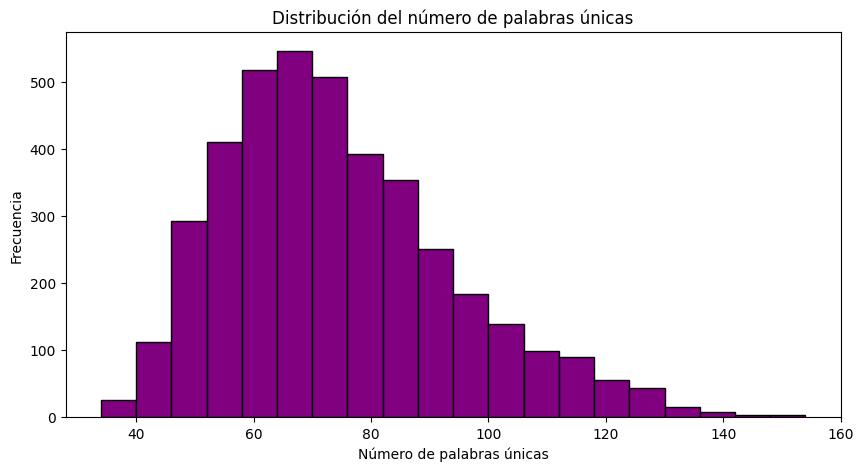

Asimetría: 0.8350624465488269, Curtosis: 0.32436533938895895


In [15]:
# Contar el número de palabras únicas en cada mensaje
textos['palabras_unicas'] = textos['Textos_espanol'].apply(lambda x: len(set(x.split())))

# Histograma de la distribución de palabras únicas
plt.figure(figsize=(10, 5))
plt.hist(textos['palabras_unicas'], bins=20, color='purple', edgecolor='black')
plt.title('Distribución del número de palabras únicas')
plt.xlabel('Número de palabras únicas')
plt.ylabel('Frecuencia')
plt.show()
#Imprimir la asimetría y curtosis
print(f"Asimetría: {skewness}, Curtosis: {kurtosis}")

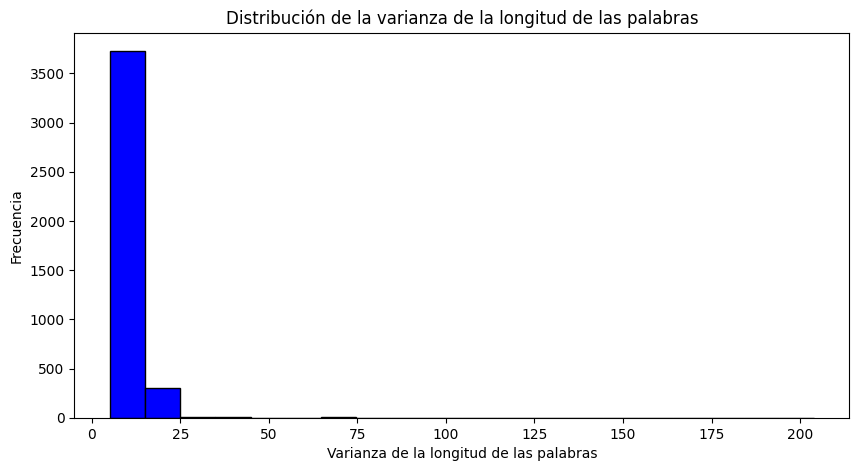

In [16]:
# Histograma de la distribución de la varianza de la longitud de las palabras
plt.figure(figsize=(10, 5))
plt.hist(textos['Varianza'], bins=20, color='blue', edgecolor='black')
plt.title('Distribución de la varianza de la longitud de las palabras')
plt.xlabel('Varianza de la longitud de las palabras')
plt.ylabel('Frecuencia')
plt.show()

N-Gramas más comunes en las palabras

In [17]:
# Función para mostrar los n-gramas más comunes
def mostrar_ngramas(corpus, ngram_range=(2, 2), num=10):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:num]

# Mostrar los 10 bigramas más comunes
print(mostrar_ngramas(textos['Textos_espanol'], ngram_range=(2, 2), num=10))

# Mostrar los 10 trigramas más comunes
print(mostrar_ngramas(textos['Textos_espanol'], ngram_range=(3, 3), num=10))

[('de la', 5300), ('de los', 3653), ('de las', 2614), ('en la', 2504), ('en el', 2201), ('las mujeres', 2105), ('de género', 1301), ('en los', 1123), ('de salud', 909), ('en las', 879)]
[('de las mujeres', 880), ('de la ocde', 643), ('de género en', 341), ('igualdad de género', 332), ('países de la', 316), ('de los estudiantes', 313), ('la igualdad de', 294), ('las mujeres en', 281), ('de la salud', 280), ('la mayoría de', 266)]


Nube de palabras más comunes

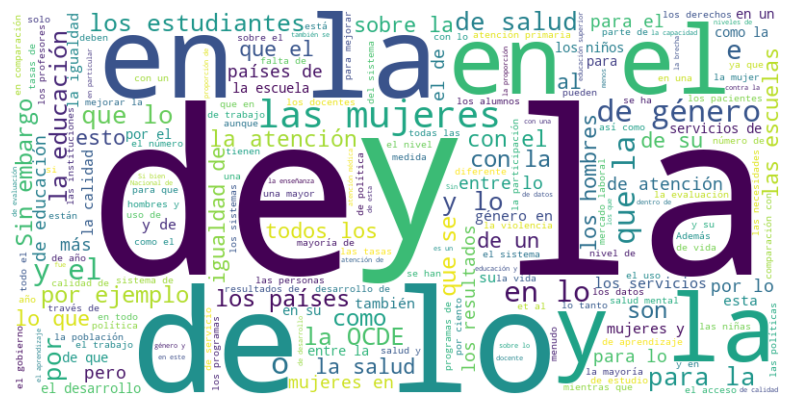

In [18]:
# Generar una nube de palabras
# Unir todos los textos en una sola cadena
all_text = ' '.join(ODS_train_data['Textos_espanol'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Análisis de sentimientos

Eje X (Sentimiento): Representa los valores de sentimiento. Estos valores generalmente oscilan entre -1 y 1:

* Valores negativos: Indican sentimientos negativos.
* Valores cercanos a 0: Indican sentimientos neutros.
* Valores positivos: Indican sentimientos positivos.

Eje Y (Frecuencia): Representa la cantidad de textos que tienen un determinado valor de sentimiento.

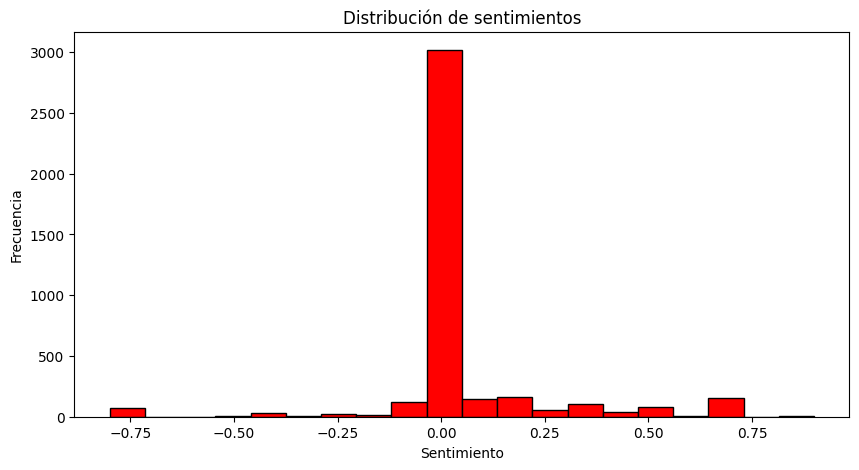

In [19]:
# Función para obtener el sentimiento de un texto
def obtener_sentimiento(texto):
    blob = TextBlob(texto)
    return blob.sentiment.polarity

# Aplicar la función a la columna de textos
textos['sentimiento'] = textos['Textos_espanol'].apply(obtener_sentimiento)

# Histograma de la distribución de sentimientos
plt.figure(figsize=(10, 5))
plt.hist(textos['sentimiento'], bins=20, color='red', edgecolor='black')
plt.title('Distribución de sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# 3. Preparación de datos

In [20]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to C:\Users\Mateo Anaya
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Mateo Anaya
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mateo Anaya
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Mateo Anaya
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Mateo Anaya R\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [21]:
# Hacemos una copia del dataset original para no modificar los datos originales
text_cleaned = ODS_train_data.copy()
text_cleaned_test = ODS_Test_data.copy()

# Función para limpiar caracteres especiales y codificaciones incorrectas
def clean_text(text):
    replacements = {
        'Ã¡': 'á', 'Ã©': 'é', 'Ã­': 'í', 'Ã³': 'ó', 'Ãº': 'ú', 'Ã±': 'ñ',
        'Ã': 'í', 'Â': '', 'Ã¼': 'ü', 'â': '', '€': '', '™': ''
    }
    for old, new in replacements.items():
        text = text.replace(old, new)
    text = re.sub(r'[^a-zA-ZáéíóúñÁÉÍÓÚÑ\s]', '', text)
    return text

# Aplicar la función de limpieza a la columna de texto
text_cleaned['Textos_espanol'] = text_cleaned['Textos_espanol'].apply(clean_text)

# Eliminar espacios en blanco adicionales
text_cleaned['Textos_espanol'] = text_cleaned['Textos_espanol'].str.strip()

text_cleaned_test['Textos_espanol'] = text_cleaned_test['Textos_espanol'].apply(clean_text)

# Eliminar espacios en blanco adicionales
text_cleaned_test['Textos_espanol'] = text_cleaned_test['Textos_espanol'].str.strip()

# Función para eliminar caracteres no ASCII
def remove_non_ascii(words):
    new_words = []
    for word in words:
        if word is not None:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
    return new_words

# Función para convertir a minúsculas
def to_lowercase(words):
    return [word.lower() for word in words if word is not None]

# Función para eliminar puntuación
def remove_punctuation(words):
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

# Función para eliminar stopwords
def remove_stopwords(words):
    stop_words = set(stopwords.words('spanish'))
    return [word for word in words if word is not None and word.lower() not in stop_words]

# Función para obtener la etiqueta de parte del discurso (POS) para lematización
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Crear el lematizador
lemmatizer = WordNetLemmatizer()

# Función para lematizar las palabras
def lemmatize_words(words):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]


nlp = spacy.load('es_core_news_sm')  # Spanish language model

def spacy_lemmatize(text):
    if not isinstance(text, str):
        return ''  # Handle non-string cases
    
    doc = nlp(text)  # Process the text with spaCy
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])


# Función de preprocesamiento
def preprocessing(text):

    if not isinstance(text, str):
        return ''


    words = word_tokenize(text)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    #words = lemmatize_words(words)
    #return ' '.join(words)

    text = ' '.join(words)  # Join words back into a string
    return spacy_lemmatize(text)

text_cleaned['cleaned_text'] = text_cleaned['Textos_espanol'].apply(lambda x: preprocessing(x))

text_cleaned_test['cleaned_text'] = text_cleaned_test['Textos_espanol'].apply(lambda x: preprocessing(x))

In [22]:
text_cleaned.head(10)

,Textos_espanol,sdg,cleaned_text
0,Por ejemplo el número de consultas externas de...,3,ejemplo numero consulta externo especialista m...
1,En el gobierno central financió directamente ...,3,gobierno central financio directamente gasto s...
2,Claramente hay muchos otros factores en juego ...,3,claramente factor juego particular variedad ba...
3,Por ejemplo el estado australiano de Victoria ...,3,ejemplo australiano victoria agencia promocion...
4,El consumo anual de alcohol se estima en litr...,3,consumo anual alcohol estimar litro ano hombre...
5,Probar pronto la medicina rural puede crear el...,3,probar medicina rural crear desear permanecer ...
6,La duración media de la estancia en el hospita...,3,duracion medio estancia hospital alo utilizar ...
7,El período retrospectivo es de años de a Lo...,3,periodo retrospectivo ano precio incluir tecno...
8,Ya se están vinculando algunos datos de los re...,3,vincular dato registro incluido relativo morta...
9,En este sentido es una forma eficaz de mejorar...,3,forma eficaz mejorar eficacia calidad servicio...


In [23]:
text_cleaned_test.head(10)

,Textos_espanol,sdg,cleaned_text
0,Han examinado la contribución de las universid...,NaN,examinar contribucion universidades institucio...
1,En la última década y en particular desde el ...,NaN,ultimo decado particular numero alto per capit...
2,En qué países los estudiantes de alto rendimie...,NaN,país estudiante alto rendimiento sentir atraid...
3,A raíz de su preocupación por el hecho de que ...,NaN,raiz preocupacion medico sistema sanitario jap...
4,H Ares Abalde ij El pequeño número de estudian...,NaN,h ar abalde ij pequeno numero estudiante docen...
5,A continuación se propone una síntesis de país...,NaN,continuacion proponer sintesis pais resaltar c...
6,A diferencia de los acuerdos anteriores la nue...,NaN,diferenciar acuerdo anterior normativa estipul...
7,Por ejemplo los servicios de urgencias tienen ...,NaN,ejemplo servicio urgencia prestar asistencia c...
8,A lo largo de diez años cerraron escuelas espe...,NaN,ano cerrar escuela especial destinar recurso s...
9,A medida que se implemente la nueva estructura...,NaN,medida implemente estructura carrero crucial p...


In [24]:
# # Hacemos una copia del dataset original para no modificar los datos originales
# text_cleaned = ODS_train_data.copy()
# text_cleaned_test = ODS_Test_data.copy()

# # Función para limpiar caracteres especiales y codificaciones incorrectas
# def clean_text(text):
#     replacements = {
#         'Ã¡': 'á', 'Ã©': 'é', 'Ã­': 'í', 'Ã³': 'ó', 'Ãº': 'ú', 'Ã±': 'ñ',
#         'Ã': 'í', 'Â': '', 'Ã¼': 'ü', 'â': '', '€': '', '™': ''
#     }
#     for old, new in replacements.items():
#         text = text.replace(old, new)
#     text = re.sub(r'[^a-zA-ZáéíóúñÁÉÍÓÚÑ\s]', '', text)
#     return text

# # Aplicar la función de limpieza a la columna de texto
# text_cleaned['Textos_espanol'] = text_cleaned['Textos_espanol'].apply(clean_text)

# # Eliminar espacios en blanco adicionales
# text_cleaned['Textos_espanol'] = text_cleaned['Textos_espanol'].str.strip()

# text_cleaned_test['Textos_espanol'] = text_cleaned_test['Textos_espanol'].apply(clean_text)

# # Eliminar espacios en blanco adicionales
# text_cleaned_test['Textos_espanol'] = text_cleaned_test['Textos_espanol'].str.strip()

# # Función para eliminar caracteres no ASCII
# def remove_non_ascii(words):
#     new_words = []
#     for word in words:
#         if word is not None:
#             new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#             new_words.append(new_word)
#     return new_words

# # Función para convertir a minúsculas
# def to_lowercase(words):
#     return [word.lower() for word in words if word is not None]

# # Función para eliminar puntuación
# def remove_punctuation(words):
#     new_words = []
#     for word in words:
#         if word is not None:
#             new_word = re.sub(r'[^\w\s]', '', word)
#             if new_word != '':
#                 new_words.append(new_word)
#     return new_words

# # Función para eliminar stopwords
# def remove_stopwords(words):
#     stop_words = set(stopwords.words('spanish'))
#     return [word for word in words if word is not None and word.lower() not in stop_words]

# # Función para obtener la etiqueta de parte del discurso (POS) para lematización
# def get_wordnet_pos(word):
#     """Map POS tag to first character lemmatize() accepts"""
#     tag = nltk.pos_tag([word])[0][1][0].upper()
#     tag_dict = {"J": wordnet.ADJ,
#                 "N": wordnet.NOUN,
#                 "V": wordnet.VERB,
#                 "R": wordnet.ADV}
#     return tag_dict.get(tag, wordnet.NOUN)

# lemmatizer = WordNetLemmatizer()

# # Función para lematizar las palabras
# def lemmatize_words(words):
#     return [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]


# # Función de preprocesamiento
# def preprocessing(text):
#     words = word_tokenize(text)
#     words = to_lowercase(words)
#     words = remove_punctuation(words)
#     words = remove_non_ascii(words)
#     words = remove_stopwords(words)
#     words = lemmatize_words(words)
#     return ' '.join(words)

    

# text_cleaned['cleaned_text'] = text_cleaned['Textos_espanol'].apply(lambda x: preprocessing(x))

# text_cleaned_test['cleaned_text'] = text_cleaned_test['Textos_espanol'].apply(lambda x: preprocessing(x))

# 4. Modelado y Evaluación

# 4.1 Creación de modelos

In [50]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(text_cleaned['cleaned_text'], text_cleaned['sdg'], test_size=0.2, random_state=42)

# Convertir el texto en una matriz de características
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

X_test_vec_2 = vectorizer.transform(text_cleaned_test['cleaned_text'])

Modelo 1

In [26]:
# Crear y entrenar el modelo Multinomial Naive Bayes
modelnb = MultinomialNB()
modelnb.fit(X_train_vec, y_train)

# Evaluar el modelo
y_pred = modelnb.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9740740740740741
Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.96      0.98       250
           4       0.97      0.98      0.98       268
           5       0.95      0.98      0.97       292

    accuracy                           0.97       810
   macro avg       0.98      0.97      0.97       810
weighted avg       0.97      0.97      0.97       810



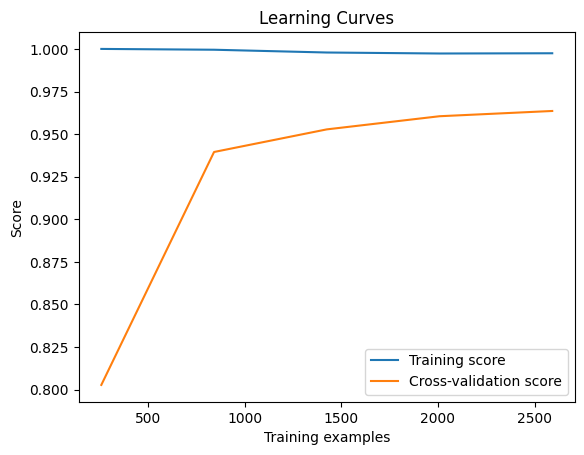

In [27]:
# Obtener las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(modelnb, X_train_vec, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calcular las medias de las puntuaciones de entrenamiento y prueba
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Graficar las curvas de aprendizaje
plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend()
plt.show()

In [28]:
# Evaluar usando validación cruzada
scores = cross_val_score(modelnb, X_train_vec, y_train, cv=5, scoring='accuracy')
print("Scores de validación cruzada:", scores)
print("Promedio de los scores:", scores.mean())

Scores de validación cruzada: [0.97067901 0.96296296 0.96296296 0.96141975 0.95981453]
Promedio de los scores: 0.9635678439903066


In [29]:
# Evaluar usando Kfold Cross-Validation
kf = KFold(n_splits=5)
scores = cross_val_score(modelnb, X_train_vec, y_train, cv=kf, scoring='accuracy')
print("Scores de K-Fold Cross-Validation:", scores)
print("Promedio de los scores:", scores.mean())

Scores de K-Fold Cross-Validation: [0.96450617 0.96604938 0.95061728 0.9537037  0.96290572]
Promedio de los scores: 0.9595564523823154


In [30]:
# Evaluar usando Leave-One-Out Cross-Validation
loo = LeaveOneOut()
scores = cross_val_score(modelnb, X_train_vec, y_train, cv=loo, scoring='accuracy')
print("Scores de Leave-One-Out Cross-Validation:", scores)
print("Promedio de los scores:", scores.mean())

Scores de Leave-One-Out Cross-Validation: [1. 1. 1. ... 1. 1. 1.]
Promedio de los scores: 0.9638777400432232


In [31]:
# Evaluar usando Repeated K-Fold Cross-Validation
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
scores = cross_val_score(modelnb, X_train_vec, y_train, cv=rkf, scoring='accuracy')
print("Scores de Repeated K-Fold Cross-Validation:", scores)
print("Promedio de los scores:", scores.mean())

Scores de Repeated K-Fold Cross-Validation: [0.96604938 0.9537037  0.97067901 0.96296296 0.95981453 0.97067901
 0.94598765 0.95679012 0.96141975 0.96599691 0.97222222 0.95679012
 0.95216049 0.96604938 0.9675425  0.95524691 0.96759259 0.9691358
 0.9537037  0.96136012 0.96141975 0.97222222 0.96141975 0.95833333
 0.95672334 0.95987654 0.96296296 0.9537037  0.97222222 0.96136012
 0.95833333 0.94444444 0.96141975 0.97222222 0.9675425  0.95833333
 0.96141975 0.96604938 0.96604938 0.95826893 0.95987654 0.95061728
 0.95987654 0.97993827 0.95672334 0.96759259 0.9691358  0.94444444
 0.95987654 0.9675425 ]
Promedio de los scores: 0.9617167553952716


Modelo 2

In [32]:
# Crear y entrenar el modelo SVM
modelsvn = SVC(kernel='linear')
modelsvn.fit(X_train_vec, y_train)

y_pred = modelsvn.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9851851851851852
Classification Report:
              precision    recall  f1-score   support

           3       0.99      0.99      0.99       250
           4       0.98      0.98      0.98       268
           5       0.99      0.99      0.99       292

    accuracy                           0.99       810
   macro avg       0.99      0.99      0.99       810
weighted avg       0.99      0.99      0.99       810



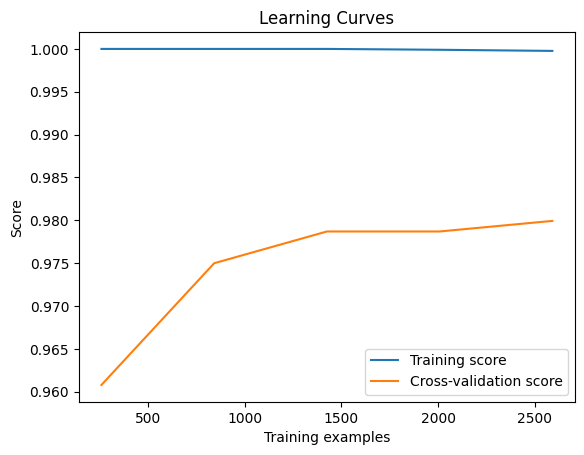

In [33]:
# Obtener las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(modelsvn, X_train_vec, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calcular las medias de las puntuaciones de entrenamiento y prueba
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Graficar las curvas de aprendizaje
plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend()
plt.show()

In [34]:
# Evaluar usando validación cruzada
scores = cross_val_score(modelsvn, X_train_vec, y_train, cv=5, scoring='accuracy')
print("Scores de validación cruzada:", scores)
print("Promedio de los scores:", scores.mean())

Scores de validación cruzada: [0.98302469 0.97993827 0.97839506 0.98611111 0.97372488]
Promedio de los scores: 0.9802388039765682


In [35]:
# Evaluar usando Kfold Cross-Validation
kf = KFold(n_splits=5)
scores = cross_val_score(modelsvn, X_train_vec, y_train, cv=kf, scoring='accuracy')
print("Scores de K-Fold Cross-Validation:", scores)
print("Promedio de los scores:", scores.mean())

Scores de K-Fold Cross-Validation: [0.98302469 0.98302469 0.97222222 0.98611111 0.97217929]
Promedio de los scores: 0.9793124010151317


In [36]:
# # Evaluar usando Leave-One-Out Cross-Validation
# loo = LeaveOneOut()
# scores = cross_val_score(modelsvn, X_train_vec, y_train, cv=loo, scoring='accuracy')
# print("Scores de Leave-One-Out Cross-Validation:", scores)
# print("Promedio de los scores:", scores.mean())

In [37]:
# # Evaluar usando Repeated K-Fold Cross-Validation
# rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
# scores = cross_val_score(modelsvn, X_train_vec, y_train, cv=rkf, scoring='accuracy')
# print("Scores de Repeated K-Fold Cross-Validation:", scores)
# print("Promedio de los scores:", scores.mean())

Modelo 3

In [38]:
# Crear y entrenar el modelo Random Forest Classifier
modelrf = RandomForestClassifier(random_state=42, n_estimators=100)
modelrf.fit(X_train_vec, y_train)


y_pred = modelrf.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9654320987654321
Classification Report:
              precision    recall  f1-score   support

           3       0.98      0.97      0.97       250
           4       0.96      0.97      0.97       268
           5       0.96      0.96      0.96       292

    accuracy                           0.97       810
   macro avg       0.97      0.97      0.97       810
weighted avg       0.97      0.97      0.97       810



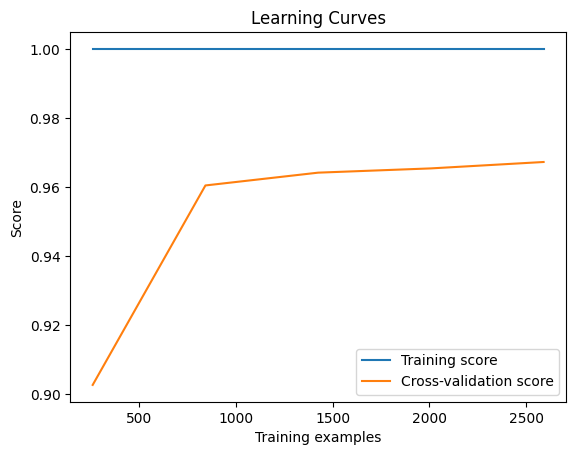

In [39]:
# Obtener las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(modelrf, X_train_vec, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calcular las medias de las puntuaciones de entrenamiento y prueba
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Graficar las curvas de aprendizaje
plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend()
plt.show()

In [40]:
# Evaluar usando validación cruzada
scores = cross_val_score(modelrf, X_train_vec, y_train, cv=5, scoring='accuracy')
print("Scores de validación cruzada:", scores)
print("Promedio de los scores:", scores.mean())

Scores de validación cruzada: [0.9691358  0.96296296 0.96296296 0.97376543 0.96445131]
Promedio de los scores: 0.9666556948499245


# 5.  Resultados


In [41]:
y_pred_modelnb = modelnb.predict(X_test_vec_2)

df_predictions_1 = pd.DataFrame(y_pred_modelnb, columns=['Predictions'])

# Save the DataFrame to an Excel file
df_predictions_1.to_excel('predictions_modelnb.xlsx', index=False)

In [42]:
y_pred_modelsvn  = modelsvn.predict(X_test_vec_2)

df_predictions_2 = pd.DataFrame(y_pred_modelsvn, columns=['Predictions'])

# Save the DataFrame to an Excel file
df_predictions_2.to_excel('predictions_modelsvn.xlsx', index=False)

In [43]:
y_pred_modelrf  = modelrf.predict(X_test_vec_2)

df_predictions_3 = pd.DataFrame(y_pred_modelrf, columns=['Predictions'])

# Save the DataFrame to an Excel file
df_predictions_3.to_excel('predictions_modelrf.xlsx', index=False)

*Análisis de Frecuencia de Palabras*

In [44]:

texts = text_cleaned['cleaned_text'].copy()

# Crear el vectorizador
vectorizer = CountVectorizer()  # Excluir palabras comunes
X = vectorizer.fit_transform(texts)

# Obtener la frecuencia de palabras
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_sum = word_freq.sum().sort_values(ascending=False)
word_sum.head(10)  # Mostrar las 10 palabras más frecuentes

mujer        3180
genero       1656
salud        1636
educacion    1505
país         1445
atencion     1332
él           1154
escuela      1078
nivel        1046
sistema      1035
dtype: int64

*TF-IDF (Term Frequency-Inverse Document Frequency)*

In [45]:


# Crear el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(texts)

# Obtener los scores TF-IDF
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_mean = tfidf_df.mean().sort_values(ascending=False)
tfidf_mean.head(10)  # Mostrar las 10 palabras con mayor puntuación TF-IDF


mujer        0.040108
genero       0.025686
salud        0.025270
educacion    0.023844
atencion     0.021427
país         0.020959
escuela      0.019183
ano          0.017266
él           0.017057
ocde         0.017031
dtype: float64

In [46]:


# Filtrar textos por SDG
sdg_texts = {}
for sdg in text_cleaned['sdg'].unique():
    sdg_texts[sdg] = text_cleaned[text_cleaned['sdg'] == sdg]['cleaned_text']

In [47]:
# Diccionario para almacenar palabras clave por SDG
sdg_keywords = {}

# Calcular TF-IDF para cada SDG
for sdg, texts in sdg_texts.items():
    tfidf_vectorizer = TfidfVectorizer()
    X_tfidf = tfidf_vectorizer.fit_transform(texts)
    tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    tfidf_mean = tfidf_df.mean().sort_values(ascending=False)
    
    # Almacenar las palabras clave más significativas
    sdg_keywords[sdg] = tfidf_mean.head(10)  # Ajusta el número según tus necesidades

# Mostrar las palabras clave para cada SDG
for sdg, keywords in sdg_keywords.items():
    print(f"Palabras clave para {sdg}:")
    print(keywords)
    print()

Palabras clave para 3:
salud         0.050208
atencion      0.044862
servicio      0.029867
mental        0.025415
paciente      0.024252
país          0.023408
medico        0.023070
sanitario     0.022506
sistema       0.021977
enfermedad    0.020422
dtype: float64

Palabras clave para 4:
educacion      0.042245
escuela        0.038138
docente        0.031063
estudiante     0.026916
escolar        0.026627
aprendizaje    0.024763
educativo      0.023389
evaluacion     0.023332
alumno         0.022733
programa       0.022722
dtype: float64

Palabras clave para 5:
mujer       0.064591
genero      0.047475
igualdad    0.024632
hombre      0.024180
país        0.023034
trabajo     0.021804
politica    0.018810
él          0.018434
social      0.018372
laboral     0.017491
dtype: float64



El análisis de palabras clave mediante técnicas como TF-IDF permite identificar los términos más relevantes y frecuentemente mencionados en relación con cada ODS. Esto ayuda a destacar los temas y preocupaciones más importantes que los ciudadanos asocian con cada objetivo.

* la UNFPA puede identificar rápidamente los problemas y áreas de preocupación más mencionadas por los ciudadanos, lo cual es crucial para priorizar acciones y asignar recursos de manera eficiente.

* Permite al UNFPA asegurarse de que las opiniones de los ciudadanos se alineen con los objetivos específicos de los ODS que están siendo monitoreados.

*Análisis de Sentimientos*

In [48]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity



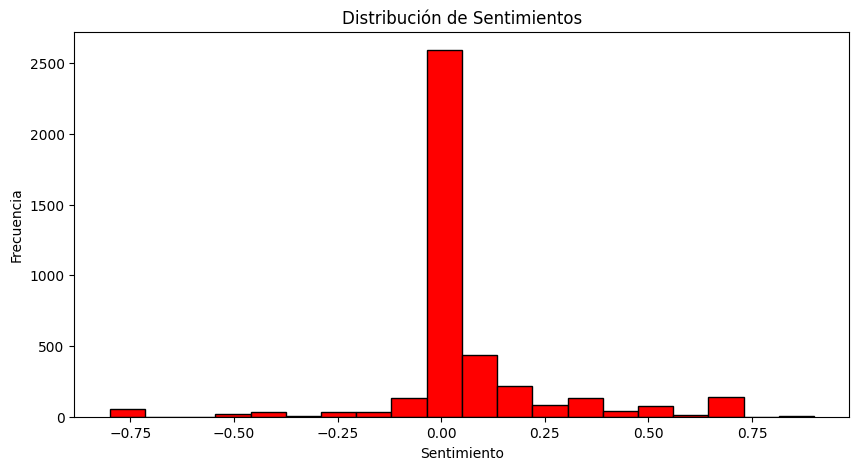

count    4049.000000
mean        0.055966
std         0.206616
min        -0.800000
25%         0.000000
50%         0.000000
75%         0.050000
max         0.900000
Name: sentimiento, dtype: float64


In [49]:


# Aplicar la función a la columna de textos
text_cleaned['sentimiento'] = text_cleaned['cleaned_text'].apply(get_sentiment)

# Histograma de la distribución de sentimientos
plt.figure(figsize=(10, 5))
plt.hist(text_cleaned['sentimiento'], bins=20, color='red', edgecolor='black')
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Analizar los resultados
sentimiento_summary = text_cleaned['sentimiento'].describe()
print(sentimiento_summary)

*Conclusiones*

Al automatizar el análisis permite manejar grandes cantidades de datos de manera más rápida y eficiente, liberando a los expertos para que se concentren en la interpretación y toma de decisiones en lugar de en el procesamiento manual.

Después de evaluar tres modelos distintos, el Support Vector Machine (SVM) ha demostrado ser el más eficaz, con una precisión general de proximadamente 98.52% y un F1 score de 0.99. Estos resultados indican que el modelo SVM clasifica correctamente la gran mayoría de los casos, proporcionando un rendimiento sobresaliente en la tarea de clasificación. 


El modelo SVM ha demostrado ser una solución altamente efectiva para la tarea de clasificación en comparación con los otros modelos evaluados. Su alta precisión y F1 score indican que es una herramienta valiosa para la organización, proporcionando resultados confiables que pueden ser utilizados para tomar decisiones estratégicas con confianza. La implementación de este modelo contribuirá significativamente a alcanzar los objetivos del negocio, optimizando la precisión en la clasificación y aumentando la eficiencia operativa.



# 6. Mapa de actores relacionado con el producto de datos creado.

# 7. Trabajo en Equipo

|Integrante|Rol|Horas de trabajo|Retos|Algoritmo|Puntos|
|----|----|----|----|----|----|
|Camilo Morillo|Lider de negocio|3 horas|Justificar las decisiones de negocio tomadas y definir las oportunidades de negocio|Random Forest Classifier|25|
|||||||
|||||||